In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)

In [2]:
Data = pd.read_csv('deliverytime.csv')

In [3]:
# Display the first few rows
print(Data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [4]:
# Display data types 
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB
None


In [5]:
# Display missing values
print(Data.isnull().sum())

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64


In [6]:
# Summary statistics
print(Data.describe())


       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73

<AxesSubplot:xlabel='Time_taken(min)', ylabel='Type_of_vehicle'>

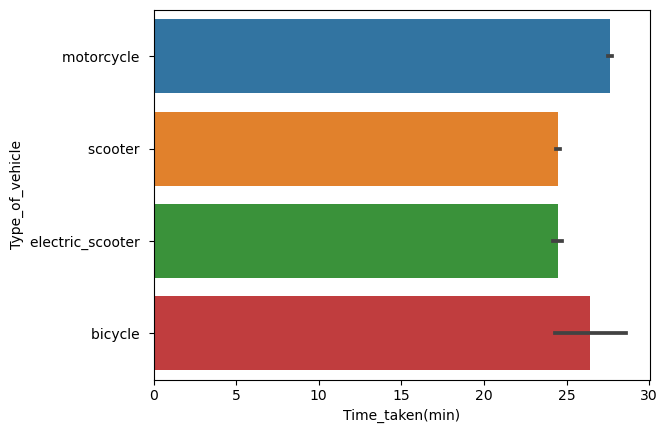

In [8]:
sns.barplot(data=Data, y='Type_of_vehicle', x='Time_taken(min)')

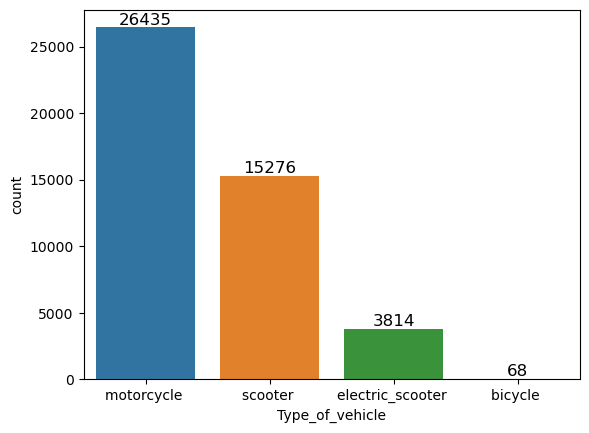

In [9]:
sns.countplot(data=Data, x='Type_of_vehicle')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', fontsize=12, ha='center', va='bottom')

In [10]:
fig = px.pie(Data, names='Type_of_order', hole=.3, title='Type of orders distribution')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

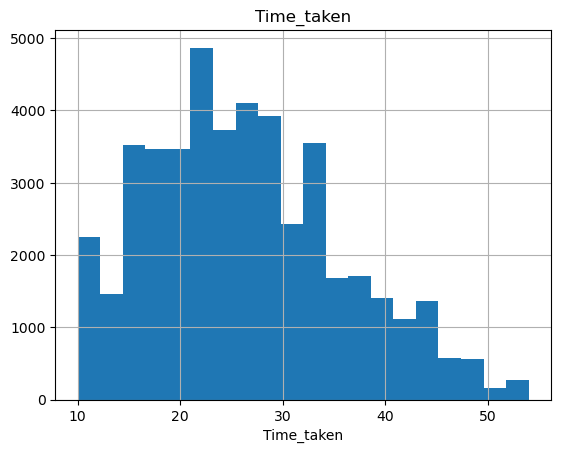

In [11]:
    Data['Time_taken(min)'].hist(bins=20)
    plt.xlabel("Time_taken")
    plt.title("Time_taken")
    plt.show()

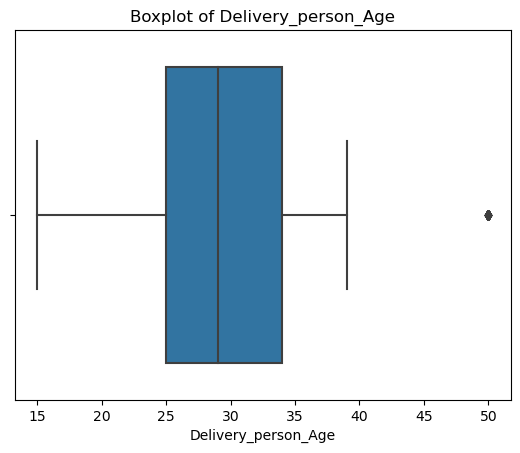

In [16]:
# Boxplot to identify outliers in a numerical column
sns.boxplot(x=Data['Delivery_person_Age'])
plt.title('Boxplot of Delivery_person_Age')
plt.show()

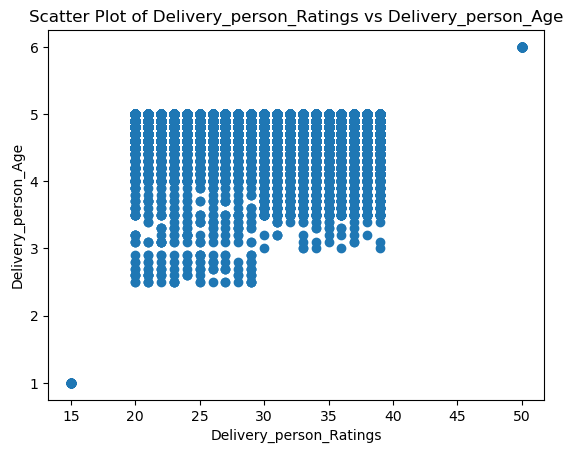

In [14]:
# Scatter plot of two variables
plt.scatter(Data['Delivery_person_Age'], Data['Delivery_person_Ratings'])
plt.title('Scatter Plot of Delivery_person_Ratings vs Delivery_person_Age')
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Delivery_person_Age')
plt.show()

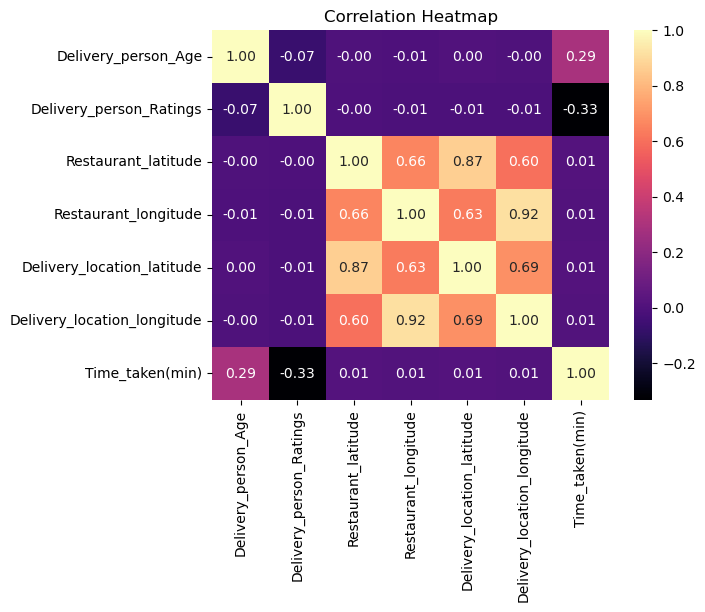

In [15]:
#Correlation heatmap
correlation_matrix = Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Mean Squared Error: 78.52949712994987


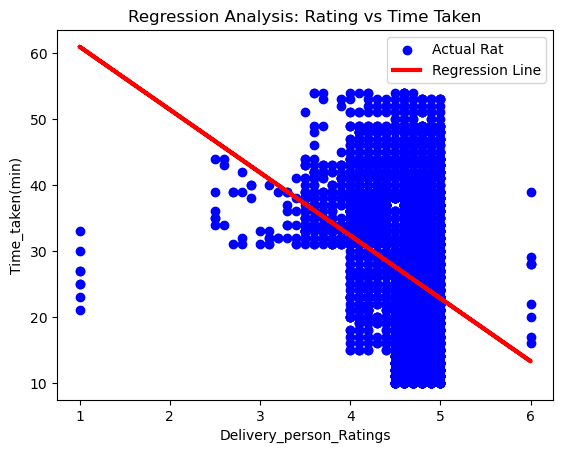

In [35]:

X = Data[['Delivery_person_Ratings']]  # Feature
y = Data['Time_taken(min)']     # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Rat')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Time_taken(min)')
plt.title('Regression Analysis: Rating vs Time Taken')
plt.legend()
plt.show()